In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This command ensures plots appear directly in the notebook
%matplotlib inline

In [2]:
import pandas as pd

# Direct link to the raw CSV file on GitHub
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

# Load the data
df = pd.read_csv(url)

# Verify it loaded correctly
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
print("Dataset Shape:", df.shape)
print("\nMissing Values per Column:\n", df.isnull().sum())
df.head(10)

Dataset Shape: (891, 12)

Missing Values per Column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# Fill Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill Embarked with the mode (most frequent value)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Map Sex to numbers
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Encode Embarked
df['Embarked'] = df['Embarked'].astype('category').cat.codes

print("Data cleaning complete. No missing values remain.")

Data cleaning complete. No missing values remain.


In [5]:
# Summary statistics
print(df.describe())

# Grouped Survival Analysis
gender_survival = df.groupby('Sex')['Survived'].mean()
class_survival = df.groupby('Pclass')['Survived'].mean()

print("\nSurvival Rate by Gender (1=Female):\n", gender_survival)
print("\nSurvival Rate by Class:\n", class_survival)

       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.352413   29.361582   
std     257.353842    0.486592    0.836071    0.477990   13.019697   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   22.000000   
50%     446.000000    0.000000    3.000000    0.000000   28.000000   
75%     668.500000    1.000000    3.000000    1.000000   35.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare    Embarked  
count  891.000000  891.000000  891.000000  891.000000  
mean     0.523008    0.381594   32.204208    1.536476  
std      1.102743    0.806057   49.693429    0.791503  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    7.910400    1.000000  
50%      0.000000    0.000000   1

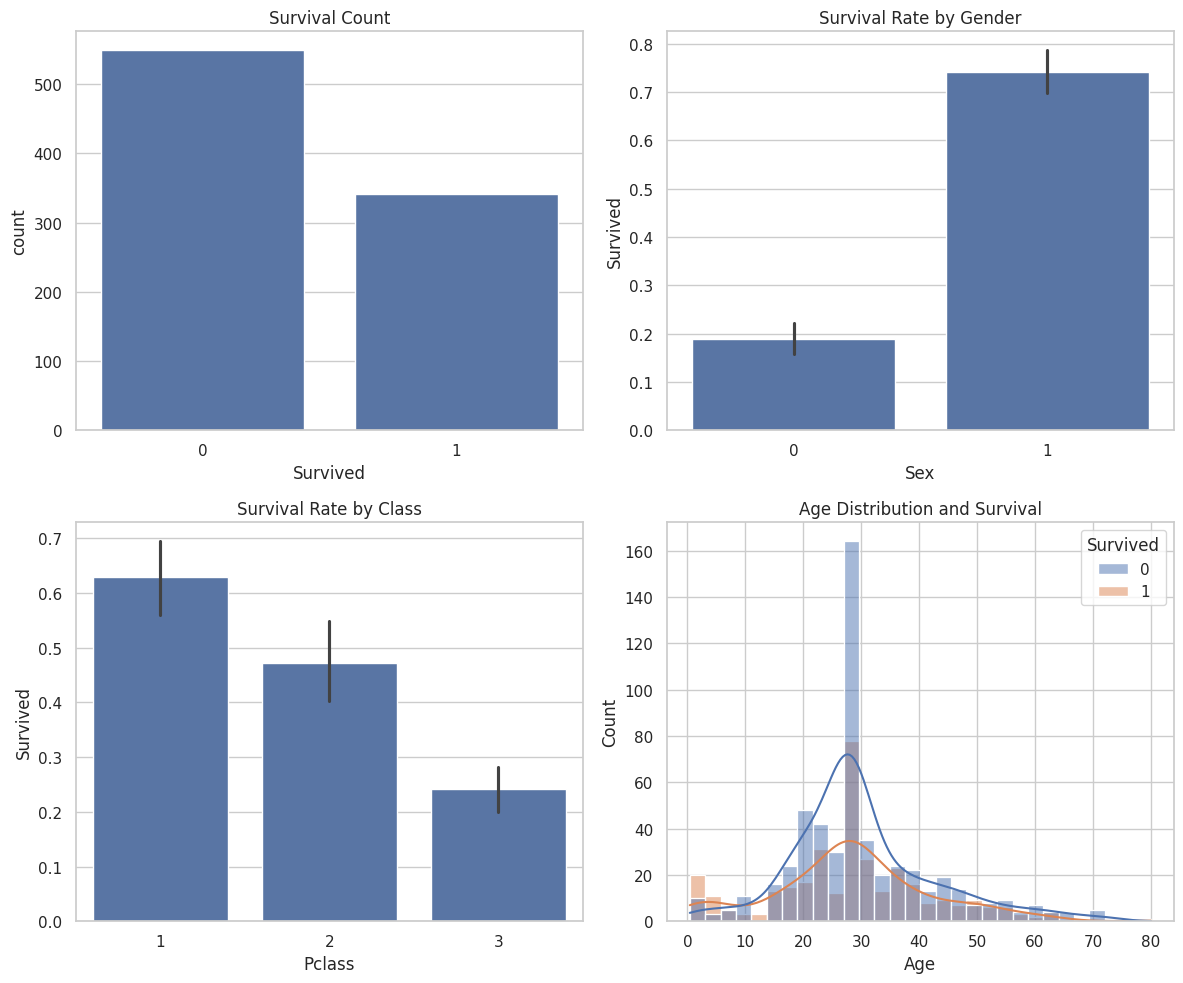

In [6]:
# Set a consistent style for all plots
sns.set(style="whitegrid")

# Create a figure with subplots for a professional look
plt.figure(figsize=(12, 10))

# Subplot 1: Survival Count
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Survived')
plt.title('Survival Count')

# Subplot 2: Survival by Gender
plt.subplot(2, 2, 2)
sns.barplot(data=df, x='Sex', y='Survived')
plt.title('Survival Rate by Gender')

# Subplot 3: Survival by Class
plt.subplot(2, 2, 3)
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title('Survival Rate by Class')

# Subplot 4: Age Distribution
plt.subplot(2, 2, 4)
sns.histplot(data=df, x='Age', hue='Survived', kde=True)
plt.title('Age Distribution and Survival')

plt.tight_layout()
plt.show()